In [53]:
import dataUtils as du
import numpy as np
import matplotlib.pyplot as plt

# Load data


In [54]:
path_base ="../Data/" #"../Data/person_data/"
hz = 30
a = 100 #acceleration in steps
samples = 3 #steps in gridsearch
stepsize = 20

#person_num = 2
#start_offset_vals = [38,55,58,58,48,64,72,63,62,62]

start_offset = 65#90#65#90#65#62 #start_offset_vals[person_num] #(frame before action)
tracking_rate = 2 #seconds between each image
wanted_frames = samples ** 6 #amount of frames to extract
frame_offset = tracking_rate*hz #time between moves
spacing = 10 #how many previous frames that have to be still
t_eps = 0.5 #translational error
r_eps =0.5 #rotational error

full_path = ""
# full_path = r"C:\Users\DGaard\Desktop\Gits\Master_MRI_Phantom\Tracking\Data\phantom_data_5step.csv"
#full_path = r"C:\Users\DGaard\Desktop\Gits\Master_MRI_Phantom\Tracking\Data\head_hang_10min.csv"
#full_path = r"C:\Users\DGaard\Desktop\Gits\Master_MRI_Phantom\Tracking\Data\isolation_movement_step5.csv"
#full_path = r"C:\Users\DGaard\Desktop\Gits\Master_MRI_Phantom\Tracking\Data\isolation_movement_v2.csv"

TOTAL FRAMES: 729 (729)
INVALID FRAMES: 0, VALID FRAMES: 729


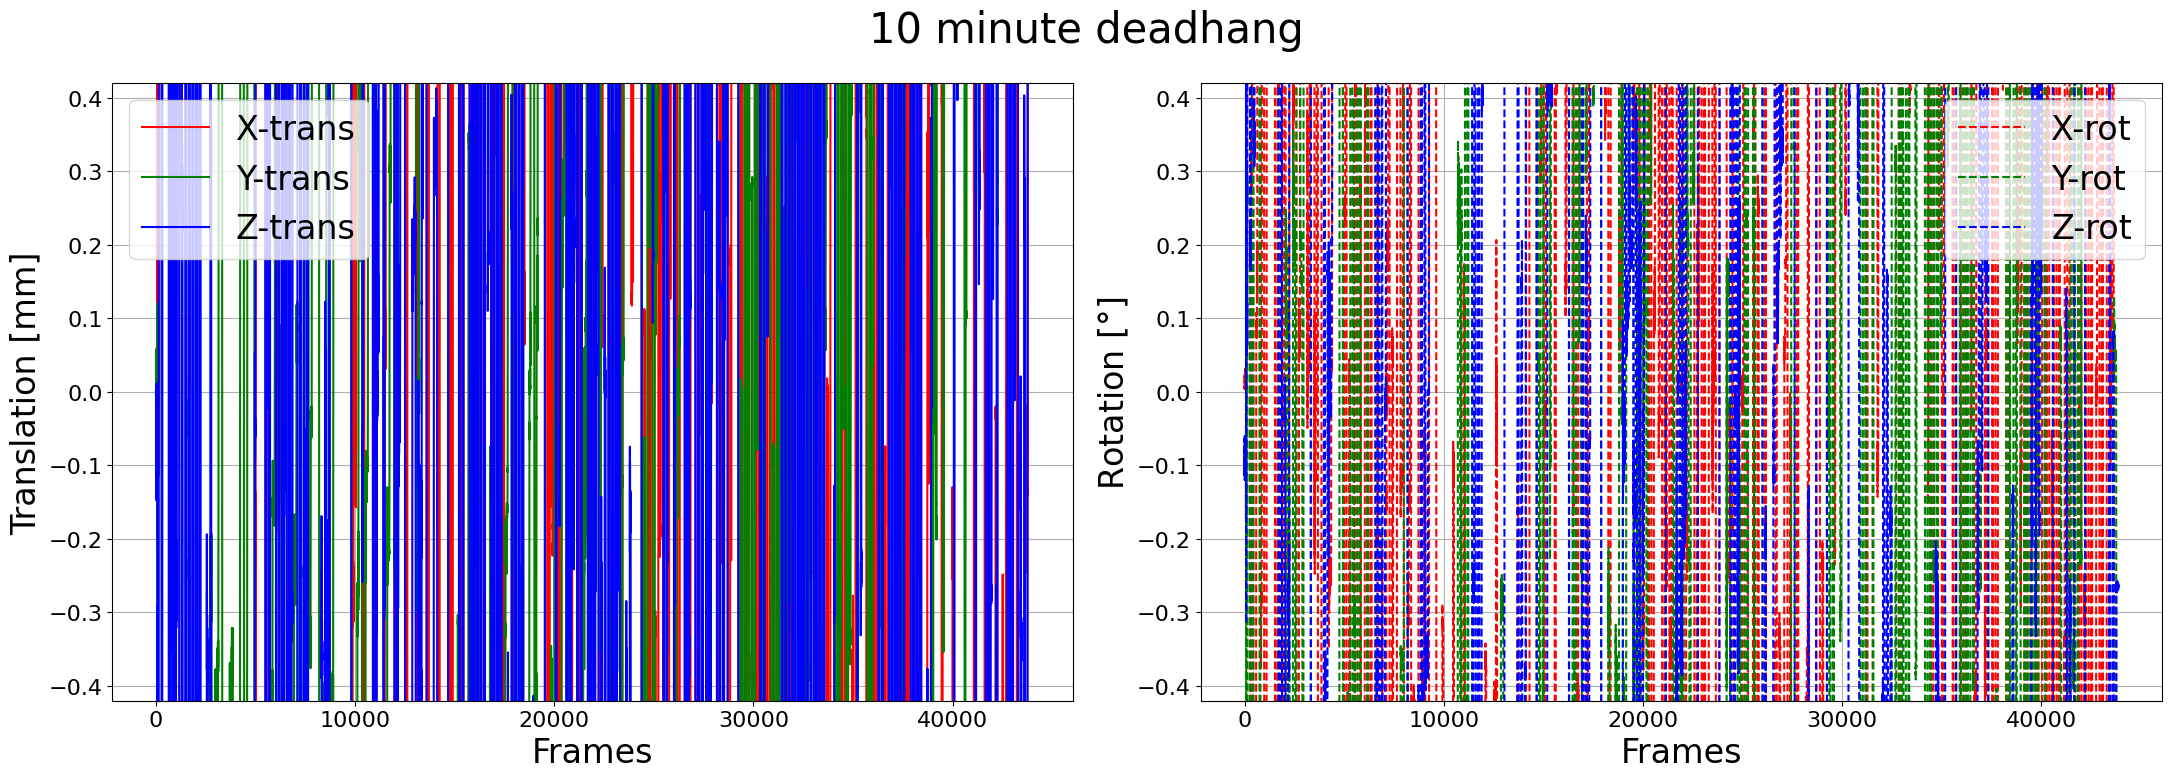

Frame      43805.000000
Time        1460.166667
X_rot          7.778208
Y_rot         10.491430
Z_rot          7.510272
X_trans        9.275269
Y_trans        5.542541
Z_trans       14.873856
dtype: float64
Frame      125.000000
Time         4.166667
X_rot       -6.316861
Y_rot      -10.544286
Z_rot       -7.188015
X_trans     -8.202880
Y_trans     -5.530762
Z_trans    -11.188171
dtype: float64


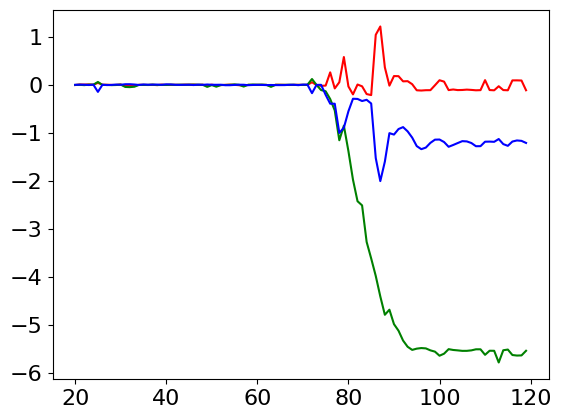

In [55]:
#load all data
#df = du.load_dataset(1,1,1,1,full_path) #du.load_testperson2(person_num,path_base)
df = du.load_dataset(a,samples,stepsize,path_base,full_path)
# Change rotations to accurate coordinate system and make translations relative to frame 0
df = du.fixCoordinates(df)

#get frames spaced 0.8
df_valid, valid_idx = du.getValidFrames(df,wanted_frames,frame_offset,start_offset,spacing,t_eps,r_eps)

#print(df.head)

#LOAD ACTUAL PERSON DATA
path = "../Data/"
f9 = np.load(path+"f9.npz")["arr_0"]
f10 = np.load(path+"f10.npz")["arr_0"]
m9 = np.load(path+"m9.npz")["arr_0"]
m10 = np.load(path+"m10.npz")["arr_0"]


temp1 = np.concatenate((f9,f10),axis=0)
temp2 = np.concatenate((m9,m10),axis = 0)
data = np.concatenate((temp1,temp2),axis=0)
#plt.rcParams.update({'font.size': 14})
#plot the initial frames shuch that the correct start offset can be found
df["Y_rot"] = df["Y_rot"] - 0.1
df["Z_rot"] = df["Z_rot"] - 0.1
plt.figure(figsize=(22,8))
#plt.suptitle("10 minute deadhang")
plt.suptitle("10 minute deadhang",fontsize=30)
plt.subplot(1,2,1)
plt.plot(df["X_trans"].loc[df["Frame"] % 1 == 0],label ="X-trans",c="red")#[25:100])
plt.plot(df["Y_trans"].loc[df["Frame"] % 1 == 0],label ="Y-trans",c="green")
plt.plot(df["Z_trans"].loc[df["Frame"] % 1 == 0],label ="Z-trans",c="blue")
plt.grid()
plt.ylabel("Translation [mm]",fontsize=24)
plt.xlabel("Frames",fontsize=24)
plt.legend(fontsize=24)
plt.ylim(-0.42,0.42)
#plt.subplot(1,2,2)
#plt.plot(df["X_rot"].loc[df["Frame"] % 1 == 0],label ="X-rot",c="red")
#plt.plot(df["Y_rot"].loc[df["Frame"] % 1 == 0],label ="Y-rot",c="green")
#plt.plot(df["Z_rot"].loc[df["Frame"] % 1 == 0],label ="Z-rot",c="blue")
#plt.ylim(-0.42,0.42)
#plt.plot(df["X_trans"],label ="X-trans",c="red")#[25:100])
#plt.plot(df["Y_trans"],label ="Y-trans",c="green")#[25:100])
#plt.plot(df["Z_trans"],label ="Z-trans",c="blue")#[25:100])
#plt.legend()
plt.subplot(1,2,2)
plt.ylim(-0.42,0.42)
plt.plot(df["X_rot"],label ="X-rot",c="red", linestyle = "--")#[25:100])
plt.plot(df["Y_rot"],label ="Y-rot",c="green", linestyle = "--")#[25:100])
plt.plot(df["Z_rot"],label ="Z-rot",c="blue", linestyle = "--")#[25:100])
plt.grid()
plt.ylabel("Rotation [$\degree$]",fontsize=24)
plt.xlabel("Frames",fontsize=24)
plt.legend(fontsize=24)
plt.tight_layout()
plt.show()

plt.plot(df["X_trans"][20:120],label ="X-trans",c="red")
plt.plot(df["Y_trans"][20:120],label ="Y-trans",c="green")
plt.plot(df["Z_trans"][20:120],label ="Z-trans",c="blue")


#see min/max values
print(df_valid.max())
print(df_valid.min())
#print(df_valid.max()- df_valid.min())
#print(df.max())
#print(df.min())
#print(df_valid.max()- df_valid.min())

#see tp min/max values
#print(data.shape)
#print(np.amin(data,axis=(0,1)))
#print(np.amax(data,axis=(0,1)))


In [56]:
print(df_valid.max())
print(df_valid.min())
print(df_valid.max()- df_valid.min())

Frame      43805.000000
Time        1460.166667
X_rot          7.778208
Y_rot         10.491430
Z_rot          7.510272
X_trans        9.275269
Y_trans        5.542541
Z_trans       14.873856
dtype: float64
Frame      125.000000
Time         4.166667
X_rot       -6.316861
Y_rot      -10.544286
Z_rot       -7.188015
X_trans     -8.202880
Y_trans     -5.530762
Z_trans    -11.188171
dtype: float64
Frame      43680.000000
Time        1456.000000
X_rot         14.095069
Y_rot         21.035716
Z_rot         14.698287
X_trans       17.478149
Y_trans       11.073303
Z_trans       26.062027
dtype: float64


# Plot data

2 5 X_trans
3 6 Y_trans
4 7 Z_trans
5 2 X_rot
6 3 Y_rot
7 4 Z_rot


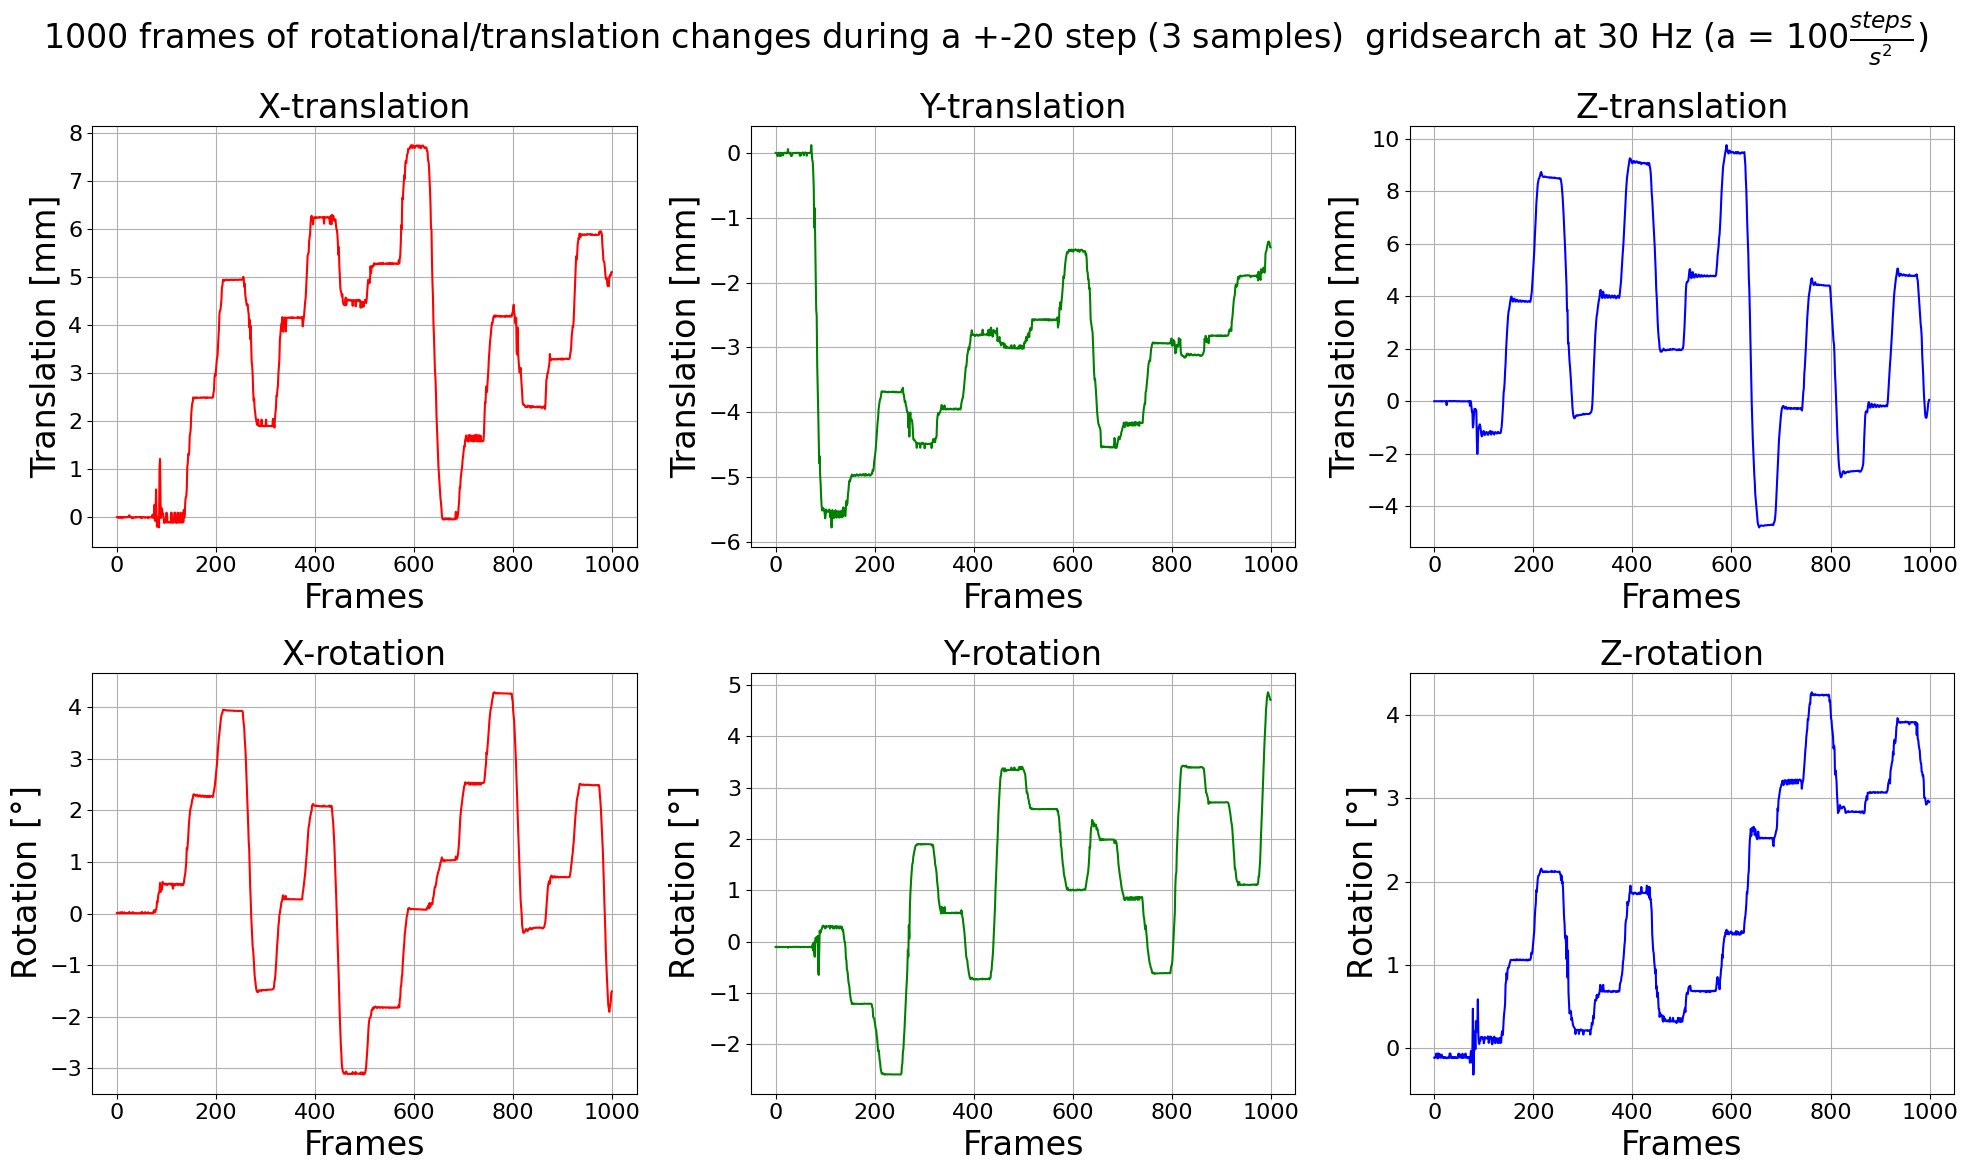

In [57]:
#Sanity check plots
colors = ["red","green","blue","red","green","blue"]
plt.figure(figsize=(20,12))
plt.suptitle(f"1000 frames of rotational/translation changes during a +-{stepsize} step ({samples} samples)  gridsearch at {hz} Hz (a = {a}" + r"$\frac{steps}{s^2}$)", fontsize=24)
ORDER = ["X-translation","Y-translation","Z-translation","X-rotation","Y-rotation","Z-rotation"]
for i in range(2,8):
  i_o = 0
  if i < 5:
    i_o = 3+i
  else:
    i_o = i - 3
  print(i,i_o,df.columns[i_o])
  plt.subplot(2,3,i-1)
  plt.plot(df.index[:1000], df.iloc[:1000, i_o], label=df.columns[i_o],c = colors[i-2])
  plt.title(f"{ORDER[i-2]}", fontsize=24)
  if "rot" in df.columns[i_o]:
    plt.ylabel("Rotation [$\degree$]", fontsize=24)
  else:
    plt.ylabel("Translation [mm]", fontsize=24)
  plt.grid()
  plt.xlabel("Frames", fontsize=24)
plt.tight_layout()
plt.show()

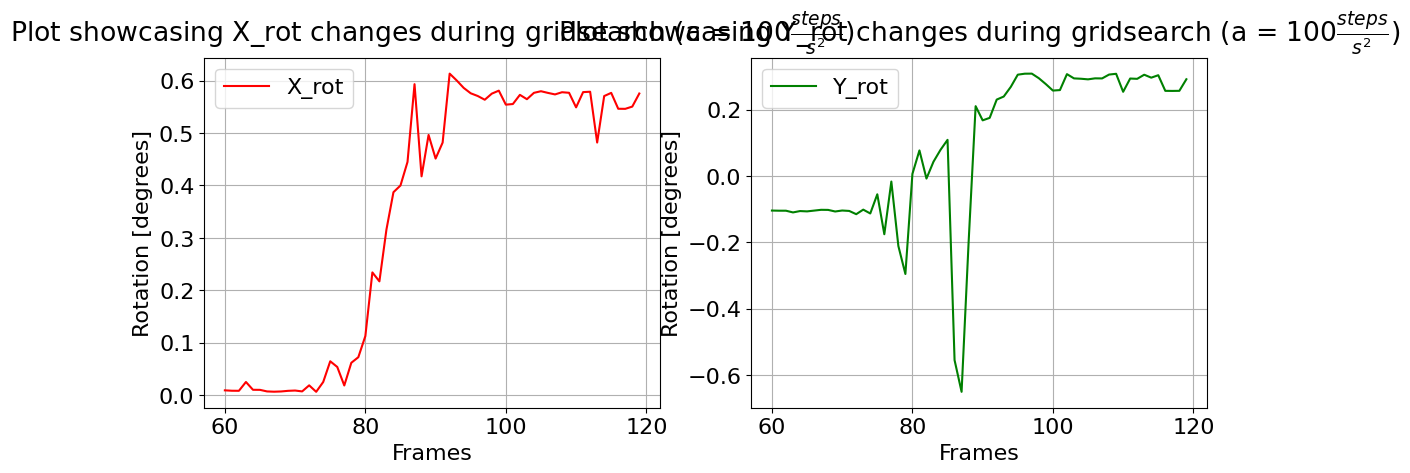

In [58]:
#SELECT THE DESIRED FRAMES (CONT)
start = 60
end = 120

plt.figure(figsize=(20,10))
for i in range(2,4):
  plt.subplot(2,3,i-1)
  plt.plot(df.index[start:end], df.iloc[start:end, i], label=df.columns[i],c = colors[i-2])
  plt.title(f"Plot showcasing {df.columns[i]} changes during gridsearch (a = {a}" + r"$\frac{steps}{s^2}$)")
  if "rot" in df.columns[i]:
    plt.ylabel("Rotation [degrees]")
  else:
    plt.ylabel("Translation [mm]")
  
  plt.xlabel("Frames")
  plt.legend()
  plt.grid()
plt.show()

# Load data


In [59]:
print(df_valid.max())
print(df_valid.min())
print(df_valid.max()- df_valid.min())

Frame      43805.000000
Time        1460.166667
X_rot          7.778208
Y_rot         10.491430
Z_rot          7.510272
X_trans        9.275269
Y_trans        5.542541
Z_trans       14.873856
dtype: float64
Frame      125.000000
Time         4.166667
X_rot       -6.316861
Y_rot      -10.544286
Z_rot       -7.188015
X_trans     -8.202880
Y_trans     -5.530762
Z_trans    -11.188171
dtype: float64
Frame      43680.000000
Time        1456.000000
X_rot         14.095069
Y_rot         21.035716
Z_rot         14.698287
X_trans       17.478149
Y_trans       11.073303
Z_trans       26.062027
dtype: float64


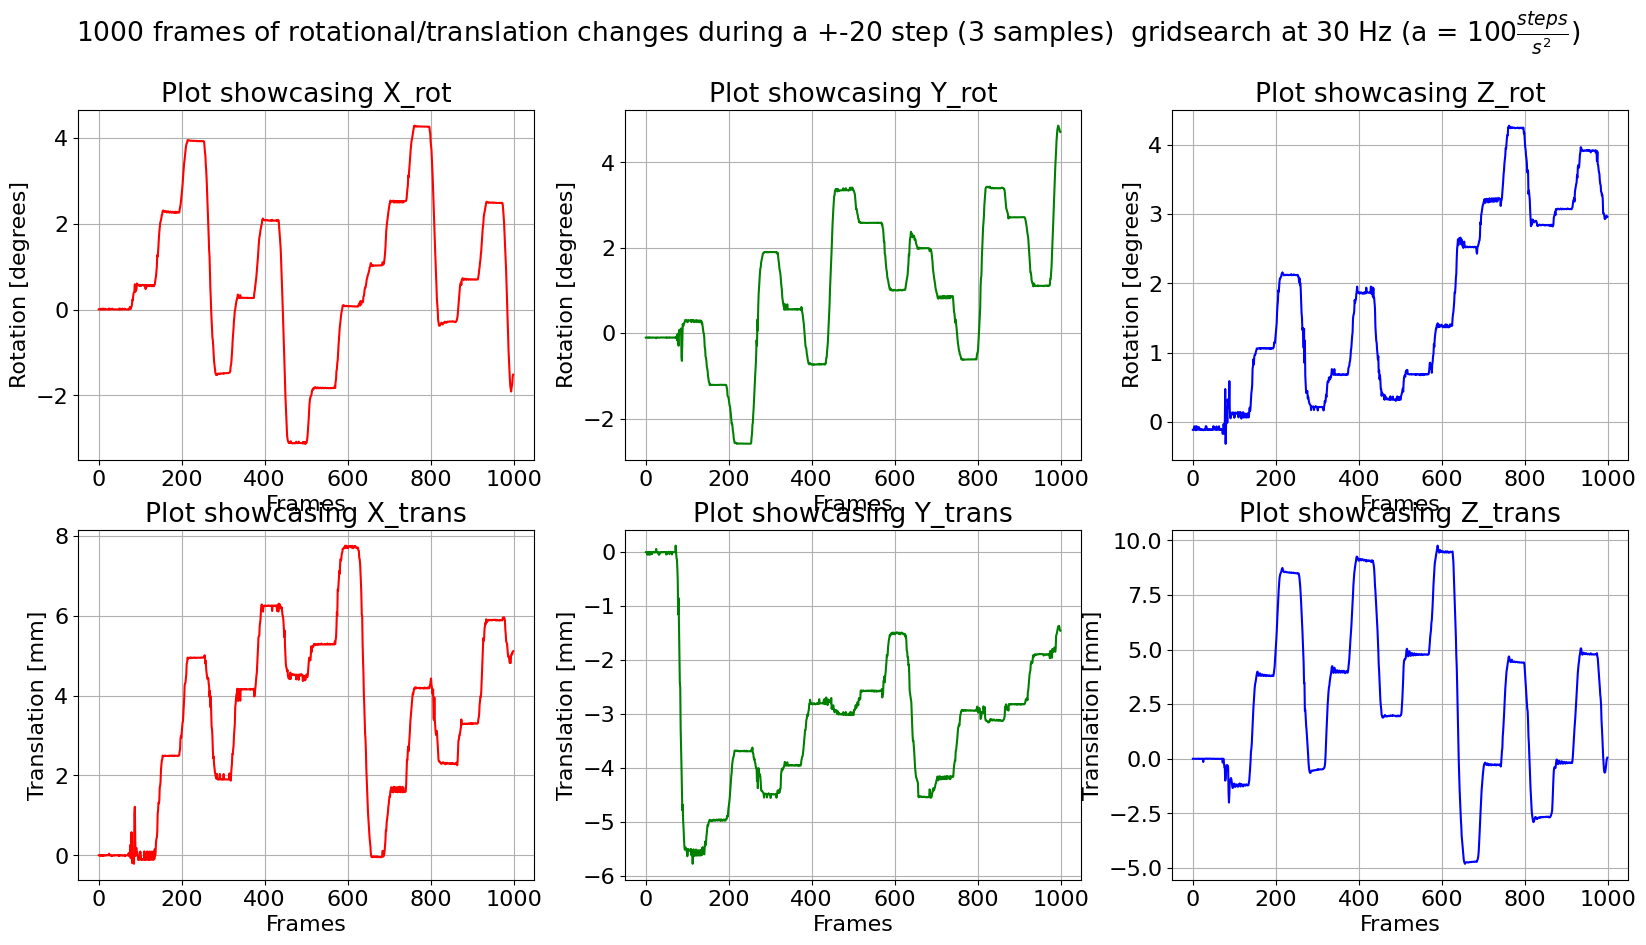

In [60]:
#Sanity check plots
colors = ["red","green","blue","red","green","blue"]
cols = []
plt.figure(figsize=(20,10))
plt.suptitle(f"1000 frames of rotational/translation changes during a +-{stepsize} step ({samples} samples)  gridsearch at {hz} Hz (a = {a}" + r"$\frac{steps}{s^2}$)")
for i in range(2,8):
  plt.subplot(2,3,i-1)
  plt.plot(df.index[:1000], df.iloc[:1000, i], label=df.columns[i],c = colors[i-2])
  plt.title(f"Plot showcasing {df.columns[i]}")
  if "rot" in df.columns[i]:
    plt.ylabel("Rotation [degrees]")
  else:
    plt.ylabel("Translation [mm]")
  plt.grid()
  plt.xlabel("Frames")
plt.show()

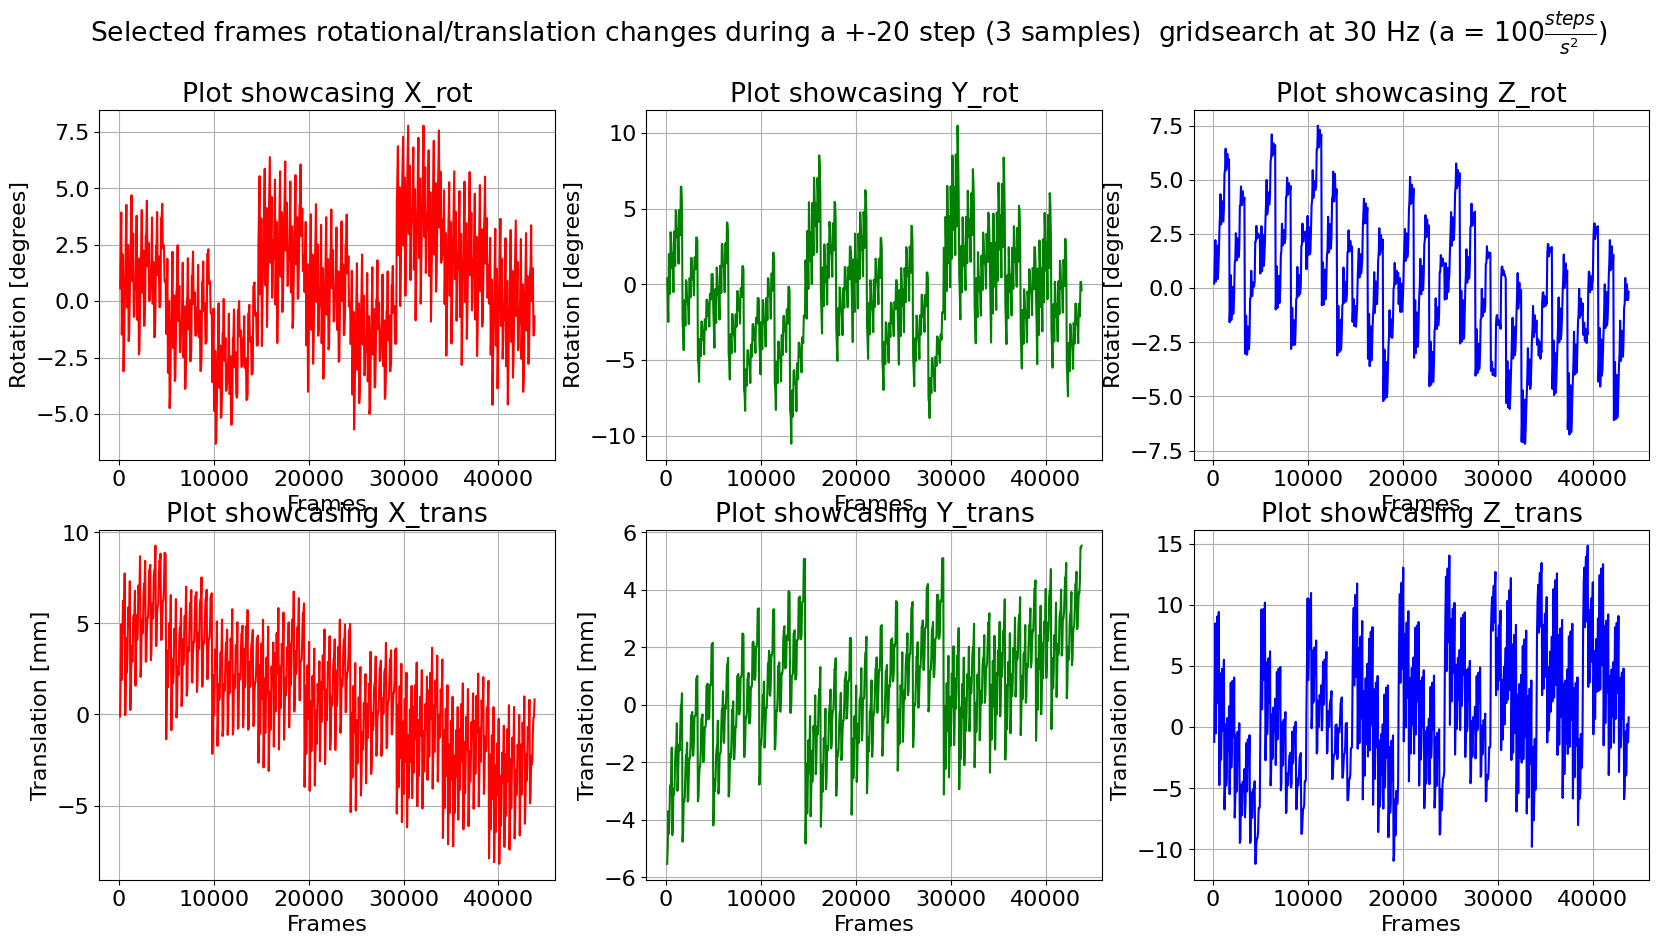

In [61]:
#plot the frames just to get an overview
colors = ["red","green","blue","red","green","blue"]
plt.figure(figsize=(20,10))
plt.suptitle(f"Selected frames rotational/translation changes during a +-{stepsize} step ({samples} samples)  gridsearch at {hz} Hz (a = {a}" + r"$\frac{steps}{s^2}$)")
for i in range(2,8):
  plt.subplot(2,3,i-1)
  plt.plot(df_valid.index, df_valid.iloc[:, i], label=df.columns[i],c = colors[i-2])
  plt.title(f"Plot showcasing {df.columns[i]}")
  if "rot" in df.columns[i]:
    plt.ylabel("Rotation [degrees]")
  else:
    plt.ylabel("Translation [mm]")
  plt.grid()
  plt.xlabel("Frames")

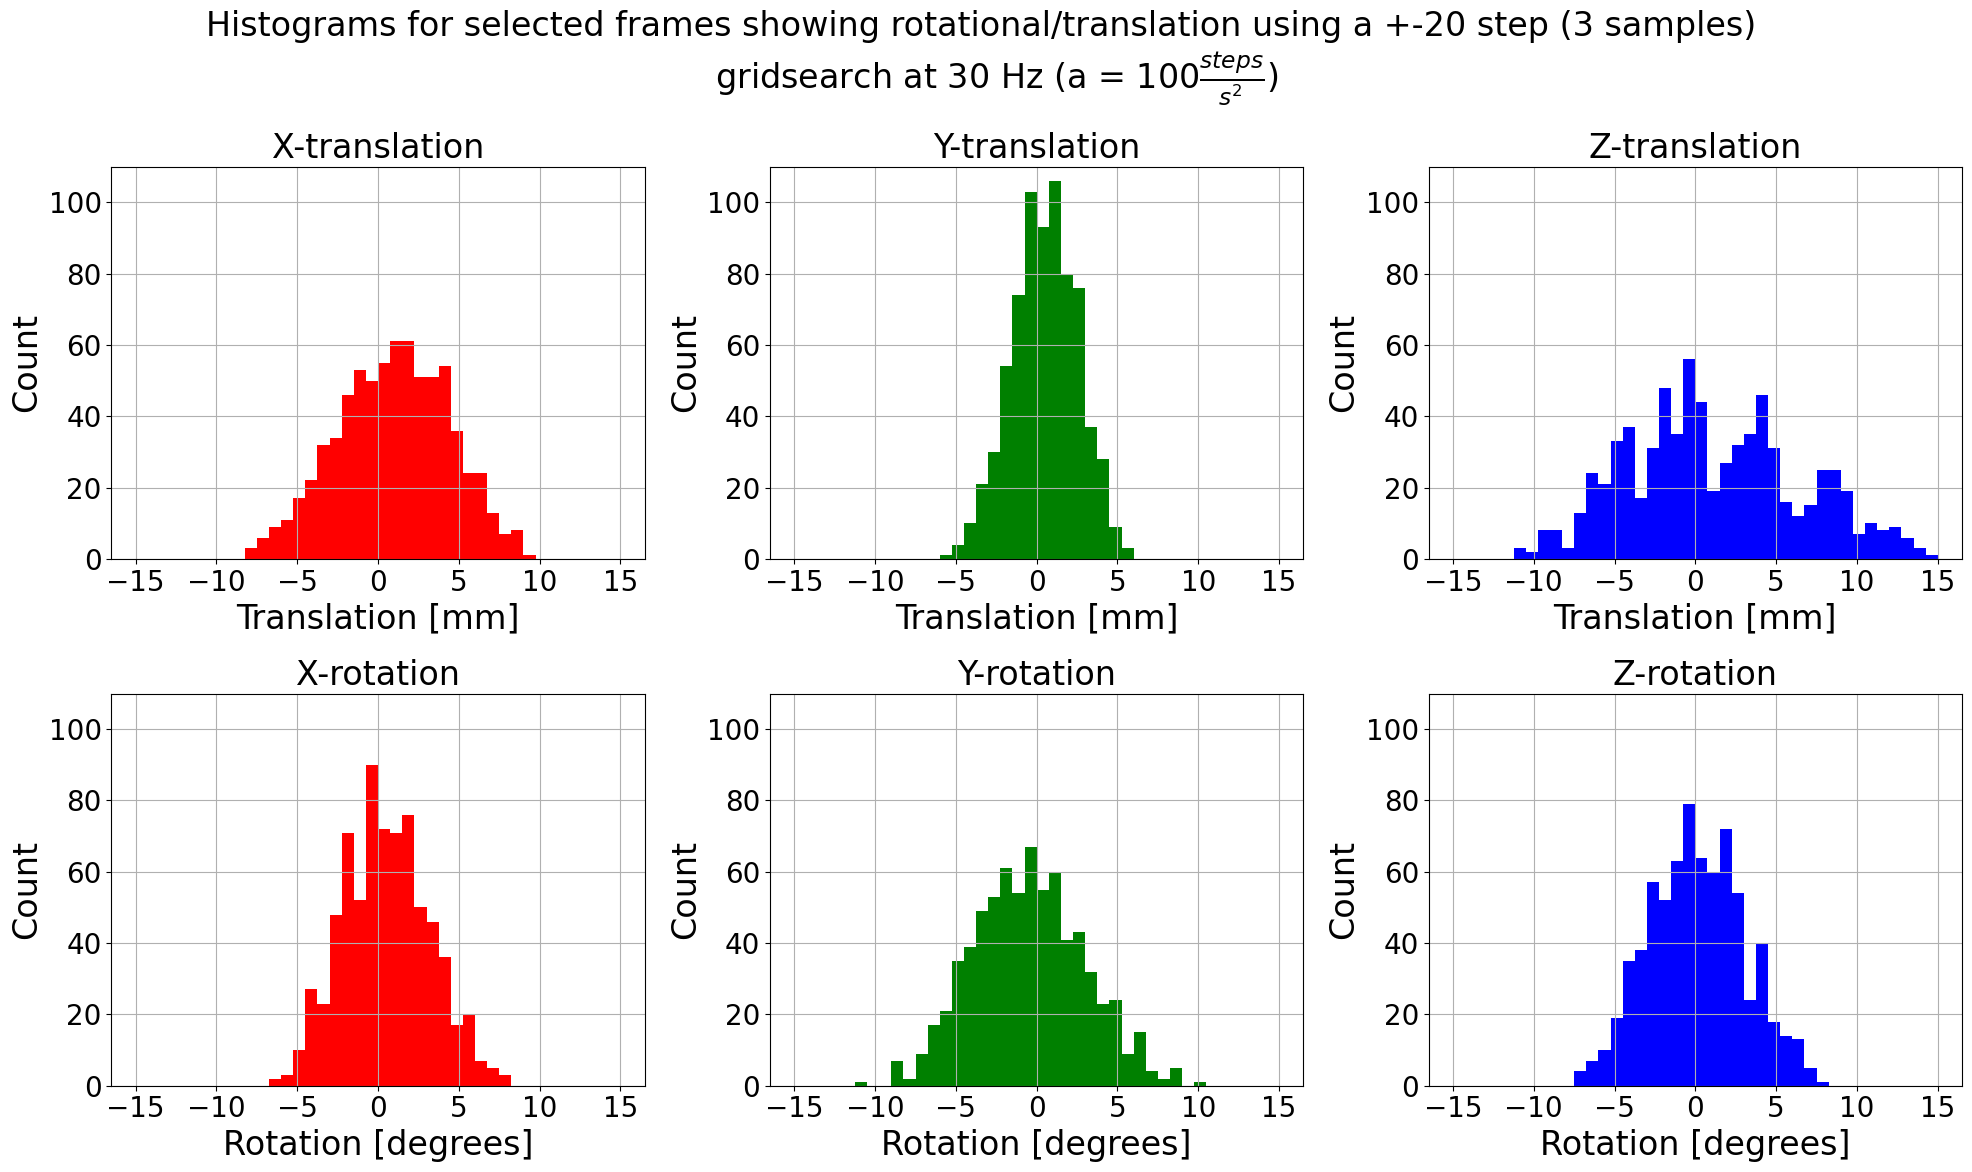

In [70]:
#PLOT DATA DISTRIBUTION FOR EACH ROT TRANS\n
col = ["X_trans", "Y_trans", "Z_trans", "X_rot", "Y_rot", "Z_rot"]
colors = ["red","green","blue","red","green","blue"]
plt.figure(figsize=(20,12))
bins = 40
plt.suptitle(f"Histograms for selected frames showing rotational/translation using a +-{stepsize} step ({samples} samples) \n  gridsearch at {hz} Hz (a = {a}" + r"$\frac{steps}{s^2}$)", fontsize=24)
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.hist(df_valid[col[i]],bins=bins,color=colors[i],range=(-15,15))
  plt.title(f"{ORDER[i]}", fontsize=24)
  if "rot" in col[i]:
    plt.xlabel("Rotation [degrees]", fontsize=24)
    plt.ylabel("Count", fontsize=24)
  else:
    plt.xlabel("Translation [mm]", fontsize=24)
    plt.ylabel("Count", fontsize=24)
  plt.grid()
  plt.ylim((0,110))
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
plt.tight_layout()
plt.show()


# Stats

In [63]:
#discarded targets
#for orig in comb_list:
#  if list(orig) not in valid_comb_list:#list(map(list,valid_comb_list)):
#    print(orig)


In [64]:
#"source": [
#    "#check if some inputs produce similar results\n",
#    "def check_similarity(df,t_eps,r_eps):\n",
#    "  similarities = []\n",
#    "  for i in range(len(df)):\n",
#    "    pos1 = df.iloc[i]\n",
#    "    i_sim = [i]\n",
#    "    for j in range(i+1,len(df)):\n",
#    "      pos2 = df.iloc[j]\n",
#    "\n",
#    "      rot = abs(pos1.iloc[-6:-3] - pos2.iloc[-6:-3])\n",
#    "      trans = abs(pos1.iloc[-3:] - pos2.iloc[-3:])\n",
#    "\n",
#    "      if  all(t < t_eps for t in trans) and all(r < r_eps for r in rot):\n",
#    "        i_sim.append(j)\n",
#    "    \n",
#    "    if len(i_sim) > 1:\n",
#    "      similarities.append(i_sim)\n",
#    "  \n",
#    "  return similarities\n",
#    "    \n",
#    "\n",
#    "\n",
#    "if True:\n",
#    "  sim_valid = check_similarity(df_valid,t_eps,r_eps)\n",
#    "  sim_valid_length = [len(x) for x in sim_valid]\n",
#    "  print(f\"Amount similar: {len(sim_valid)}\")\n",
#    "  if len(sim_valid) > 0:\n",
#    "    print(f\"Avg similarity: {np.mean(sim_valid_length)}, Min similarity {min(sim_valid_length)}, Max similarity {max(sim_valid_length)}\")\n",
#    "    print(sim_valid)"
#   ]

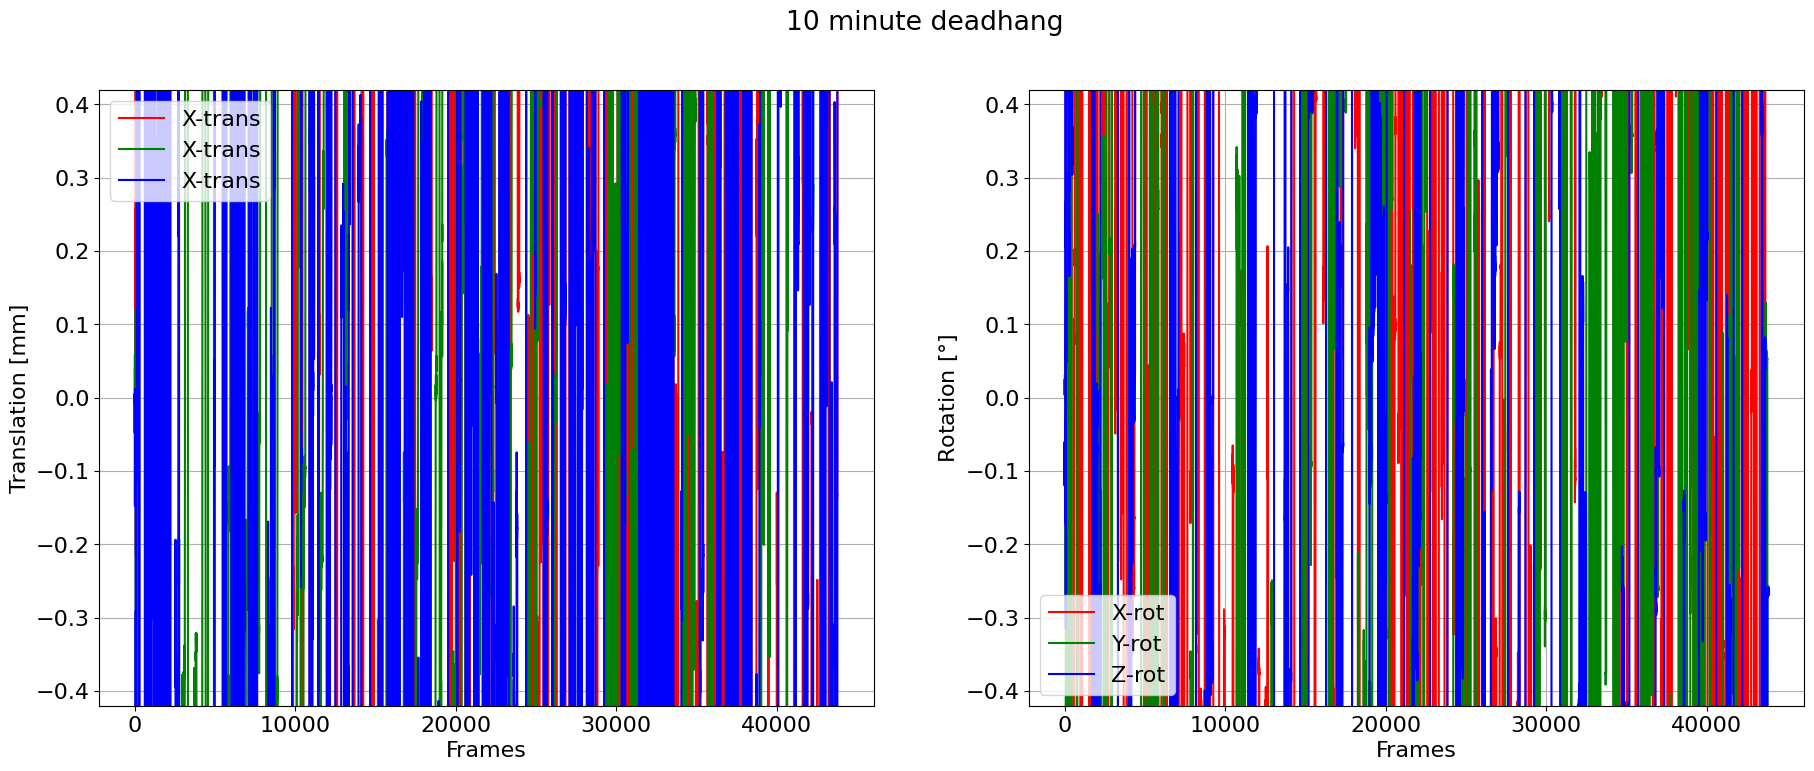

In [65]:
#deadhang plot


plt.rcParams.update({'font.size': 16})
#plot the initial frames shuch that the correct start offset can be found
plt.figure(figsize=(22,8))
#plt.suptitle("10 minute deadhang")
plt.suptitle("10 minute deadhang")
plt.subplot(1,2,1)
plt.plot(df["X_trans"].loc[df["Frame"] % 1 == 0],label ="X-trans",c="red")#[25:100])
plt.plot(df["Y_trans"].loc[df["Frame"] % 1 == 0],label ="X-trans",c="green")
plt.plot(df["Z_trans"].loc[df["Frame"] % 1 == 0],label ="X-trans",c="blue")
plt.grid()
plt.ylabel("Translation [mm]")
plt.xlabel("Frames")
plt.legend()
plt.ylim(-0.42,0.42)
plt.subplot(1,2,2)
plt.plot(df["X_rot"].loc[df["Frame"] % 1 == 0],label ="X-rot",c="red")
plt.plot(df["Y_rot"].loc[df["Frame"] % 1 == 0],label ="Y-rot",c="green")
plt.plot(df["Z_rot"].loc[df["Frame"] % 1 == 0],label ="Z-rot",c="blue")
plt.ylim(-0.42,0.42)
#plt.plot(df["X_trans"],label ="X-trans",c="red")#[25:100])
#plt.plot(df["Y_trans"],label ="Y-trans",c="green")#[25:100])
#plt.plot(df["Z_trans"],label ="Z-trans",c="blue")#[25:100])
#plt.legend()
#plt.subplot(1,2,2)
#plt.plot(df["X_rot"],label ="X-rot",c="red", linestyle = "--")#[25:100])
#plt.plot(df["Y_rot"],label ="Y-rot",c="green", linestyle = "--")#[25:100])
#plt.plot(df["Z_rot"],label ="Z-rot",c="blue", linestyle = "--")#[25:100])
plt.grid()
plt.ylabel("Rotation [$\degree$]")
plt.xlabel("Frames")
plt.legend()
plt.show()